# Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning. (Portafolio Implementación)
## Entrenamiento

### Emiliano V - A01707035

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.callbacks import ModelCheckpoint


path = "./card_data/"

train_dir = os.path.join(path,'train')
validation_dir = os.path.join(path, 'valid')
test_dir = os.path.join(path, 'test')

train_datagen = ImageDataGenerator(1./255)

val_datagen = ImageDataGenerator(1./255)


train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (224, 224),
							batch_size = 20,
							class_mode ='categorical')


val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (224, 224),
							batch_size = 20,
							class_mode = 'categorical')


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


In [16]:
def get_model():

  conv_base = MobileNetV3Small(weights = 'imagenet',
								include_top = False,
								input_shape = (224, 224, 3))

  # La siguiente linea permite definir si el modelo base se reentrena
  #conv_base.trainable = False

  model = Sequential([
    conv_base,
    GlobalAveragePooling2D(),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 53, activation = 'softmax')
    ])

  model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
  return model

In [17]:
checkpoint_path = "./checkpoints/checkpoints"

checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                                  save_weights_only = True,
                                  save_freq = "epoch",
                                  monitor = "val_accuracy",
                                  save_best_only = True,
                                  verbose = 1)

In [18]:
model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d_2  (None, 576)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 128)               73856     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 53)                3445      
                                                                 
Total params: 1024677 (3.91 MB)
Trainable params: 1012

In [19]:
history = model.fit(train_generator, epochs = 15, validation_data = val_generator, steps_per_epoch = 200, callbacks = [checkpoint])

Epoch 1/15


c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


200/200 [==============================] - ETA: 0s - loss: 2.8552 - accuracy: 0.2150
Epoch 1: val_accuracy improved from -inf to 0.18491, saving model to ./checkpoints\checkpoints
200/200 [==============================] - 202s 899ms/step - loss: 2.8552 - accuracy: 0.2150 - val_loss: 3.9406 - val_accuracy: 0.1849
Epoch 2/15
200/200 [==============================] - ETA: 0s - loss: 1.4151 - accuracy: 0.5863
Epoch 2: val_accuracy improved from 0.18491 to 0.27547, saving model to ./checkpoints\checkpoints
200/200 [==============================] - 175s 876ms/step - loss: 1.4151 - accuracy: 0.5863 - val_loss: 6.8384 - val_accuracy: 0.2755
Epoch 3/15
200/200 [==============================] - ETA: 0s - loss: 0.9473 - accuracy: 0.7200
Epoch 3: val_accuracy improved from 0.27547 to 0.31321, saving model to ./checkpoints\checkpoints
200/200 [==============================] - 169s 843ms/step - loss: 0.9473 - accuracy: 0.7200 - val_loss: 8.1571 - val_accuracy: 0.3132
Epoch 4/15
200/200 [=======

In [20]:
model.save('models/MobileNetV3_card_classifier.h5') # Guardamos el modelo

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<AxesSubplot: >

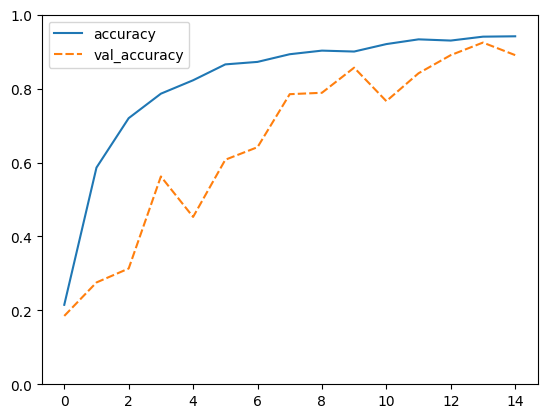

In [21]:
history_df = pd.DataFrame(history.history)

plt.ylim(0, 1.0)
sns.lineplot(data = history_df[['accuracy', 'val_accuracy']])